# **CS/CE 457/464 - Homework Assignment 10: NLP**

### Breeha Qasim 08283

###### bq08283@st.habib.edu.pk

In [336]:
# from nltk.tokenize import word_tokenize
# from nltk.tag import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk import pos_tag, word_tokenize, RegexpParser
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from bs4 import BeautifulSoup
import requests
import re
import numpy
import os
import pandas as pd

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\breeh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\breeh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Q1

In [6]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    for script in soup(["script", "style", 'aside']):
        script.extract()
        return " ".join(re.split(r'[\n\t]+', soup.get_text()))

In [54]:
nlp = spacy.load('en_core_web_sm')
ny_bb = url_to_string(
    'https://www.hrw.org/the-day-in-human-rights/2023/07/26')
article = nlp(ny_bb)
len(article.ents)

374

In [56]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'GPE': 216,
         'ORG': 56,
         'PERSON': 32,
         'DATE': 21,
         'NORP': 17,
         'CARDINAL': 8,
         'LOC': 7,
         'ORDINAL': 5,
         'LANGUAGE': 3,
         'PRODUCT': 3,
         'WORK_OF_ART': 3,
         'FAC': 2,
         'PERCENT': 1})

In [58]:
items = [x.text for x in article.ents]
Counter(items).most_common(3)

[('Taliban', 10), ('Afghanistan', 8), ('Afghan', 4)]

In [64]:
sentences = [x for x in article.sents]
s = sentences[1]
print(s)

Cuba Dominican Republic Ecuador El Salvador Guatemala Haiti Honduras Jamaica Mexico Nicaragua Panama Paraguay Peru Uruguay Venezuela       Asia          All Asia Afghanistan Australia Bangladesh Bhutan Brunei Cambodia China and Tibet Fiji India Indonesia Japan Laos Malaysia Maldives Myanmar (Burma) Nauru Nepal North Korea Pakistan Papua New Guinea Philippines Singapore South Korea Sri Lanka Taiwan Thailand Timor-Leste Vietnam       Europe/Central Asia          All Europe/Central Asia Albania Armenia Azerbaijan Belarus Belgium Bosnia and Herzegovina Bulgaria Croatia Czech Republic Denmark European Union France Georgia Germany Greece Holy See Hungary Ireland Italy Kazakhstan Kyrgyzstan Latvia Lithuania Netherlands Norway Poland Portugal Romania Russia Serbia/Kosovo Spain Sweden Switzerland Tajikistan Türkiye Turkmenistan Ukraine United Kingdom Uzbekistan       Middle East/North Africa          All Middle East/North Africa Algeria Bahrain Egypt Iran Iraq Israel/Palestine Jordan Kuwait Leb

In [66]:
displacy.render(nlp(str(s)), jupyter=True, style='ent')

In [68]:
dict([(str(x), x.label_) for x in nlp(str(s)).ents])

{'Cuba': 'GPE',
 'Ecuador': 'GPE',
 'El Salvador': 'GPE',
 'Guatemala': 'GPE',
 'Haiti': 'GPE',
 'Honduras': 'GPE',
 'Jamaica': 'GPE',
 'Mexico': 'GPE',
 'Nicaragua': 'GPE',
 'Panama': 'GPE',
 'Peru': 'GPE',
 'Asia          All Asia': 'LOC',
 'Australia': 'GPE',
 'Bangladesh': 'GPE',
 'Brunei': 'GPE',
 'Cambodia': 'GPE',
 'China': 'GPE',
 'Tibet': 'GPE',
 'Fiji': 'GPE',
 'India': 'GPE',
 'Indonesia': 'GPE',
 'Japan': 'GPE',
 'Laos': 'GPE',
 'Malaysia': 'GPE',
 'Myanmar': 'GPE',
 'Burma': 'GPE',
 'Nauru': 'GPE',
 'North Korea': 'GPE',
 'Pakistan': 'GPE',
 'New Guinea': 'GPE',
 'Philippines': 'GPE',
 'Singapore': 'GPE',
 'South Korea': 'GPE',
 'Sri Lanka': 'ORG',
 'Taiwan': 'GPE',
 'Thailand': 'GPE',
 'Timor': 'GPE',
 'Vietnam': 'GPE',
 'All Europe/Central Asia Albania': 'FAC',
 'Armenia Azerbaijan': 'PERSON',
 'Belgium Bosnia': 'GPE',
 'Bulgaria': 'GPE',
 'Croatia': 'GPE',
 'Czech': 'NORP',
 'European Union': 'ORG',
 'France': 'GPE',
 'Georgia': 'GPE',
 'Germany': 'GPE',
 'Greece': 'GPE

In [70]:
[(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp(str(s)) if not y.is_stop and y.pos_ != 'PUNCT']]

[('Cuba', 'PROPN', 'Cuba'),
 ('Dominican', 'PROPN', 'Dominican'),
 ('Republic', 'PROPN', 'Republic'),
 ('Ecuador', 'PROPN', 'Ecuador'),
 ('El', 'PROPN', 'El'),
 ('Salvador', 'PROPN', 'Salvador'),
 ('Guatemala', 'PROPN', 'Guatemala'),
 ('Haiti', 'PROPN', 'Haiti'),
 ('Honduras', 'PROPN', 'Honduras'),
 ('Jamaica', 'PROPN', 'Jamaica'),
 ('Mexico', 'PROPN', 'Mexico'),
 ('Nicaragua', 'PROPN', 'Nicaragua'),
 ('Panama', 'PROPN', 'Panama'),
 ('Paraguay', 'PROPN', 'Paraguay'),
 ('Peru', 'PROPN', 'Peru'),
 ('Uruguay', 'PROPN', 'Uruguay'),
 ('Venezuela', 'PROPN', 'Venezuela'),
 ('      ', 'SPACE', '      '),
 ('Asia', 'PROPN', 'Asia'),
 ('         ', 'SPACE', '         '),
 ('Asia', 'PROPN', 'Asia'),
 ('Afghanistan', 'PROPN', 'Afghanistan'),
 ('Australia', 'PROPN', 'Australia'),
 ('Bangladesh', 'PROPN', 'Bangladesh'),
 ('Bhutan', 'PROPN', 'Bhutan'),
 ('Brunei', 'PROPN', 'Brunei'),
 ('Cambodia', 'PROPN', 'Cambodia'),
 ('China', 'PROPN', 'China'),
 ('Tibet', 'PROPN', 'Tibet'),
 ('Fiji', 'PROPN', 'Fi

In [72]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

##### **Explanation/Reasoning:** The article's global human rights context was reflected in the NER analysis, which showed a high concentration on geopolitical entities (such as *Afghanistan*, *Pakistan*) and organisations (such as *Taliban*, *Human Rights Watch*). Although the model correctly recognised a number of entities, it struggled to handle complicated multi-word areas and contiguous proper nouns, which occasionally resulted in incorrect classifications (e.g., *"Armenia Azerbaijan"* as `PERSON`). These problems highlight difficulties in differentiating between context-specific roles and closely positioned proper nouns. Overall, the study shed light on the main topics and how frequently they occur, but it also pointed up areas where entity segmentation and precision might be strengthened.

## Q2

In [ ]:
# !pip install tika

In [ ]:
# !pip install PyPDF2

In [25]:
import PyPDF2
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\breeh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\breeh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [31]:
# import tika
# tika.initVM()
# from tika import parser
# raw = parser.from_file('women_research.pdf')

#using a different approach since Tika doesnt work

with open("women_research.pdf", 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    pdf_text = ""
    for page in reader.pages:
        pdf_text += page.extract_text()

In [35]:
tokenize_words = word_tokenize(pdf_text)
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(["T", "J", "D", "S", "M", "H", "et al", "et",
                 "pp", "a.", "m.", "d.", "j.", "s.", "r.", "c.", "t."])
no_stopwords = [word for word in tokenize_words if word.lower()
                not in stopwords]

# remove punctuation, count raw words
nonPunct = re.compile('.*[A-Za-z].*')
clean_words = [w for w in no_stopwords if nonPunct.match(w)]

filtered_word_freq = nltk.FreqDist(clean_words)

In [37]:
print(filtered_word_freq.most_common(20))

[('women', 170), ('gender', 97), ('Pakistan', 77), ('discrimination', 67), ('Women', 65), ('education', 64), ('society', 60), ('Gender', 50), ('data', 47), ('female', 47), ('n', 42), ('study', 41), ('male', 38), ('family', 37), ('Health', 36), ('men', 36), ('health', 33), ('rights', 31), ('economic', 30), ('social', 29)]


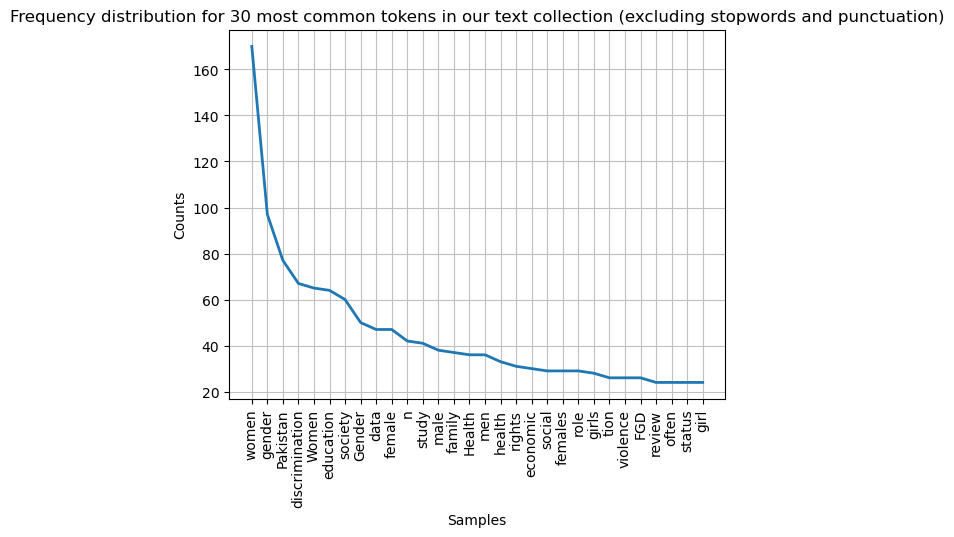

<Axes: title={'center': 'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [39]:
filtered_word_freq.plot(30,title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')

##### **Explanation/Reasoning:** The 30 most popular tokens are displayed in the frequency distribution plot, with "women," "gender," and "Pakistan" at the top. This suggests that, given Pakistan's sociopolitical setting, gender-related topics are a major focus of the literature. The use of words like "discrimination," "education," "society," and "health" further suggests that the paper addresses a range of social issues that women encounter. Words like "family" and "rights" imply legal/social rights and familial roles, which supports the document's probable emphasis on gender parity, social dynamics, and policy implications related to women's position in society. The substance of the document has a distinct thematic organisation because to this visualisation.

In [ ]:
# !pip install wordcloud

In [51]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

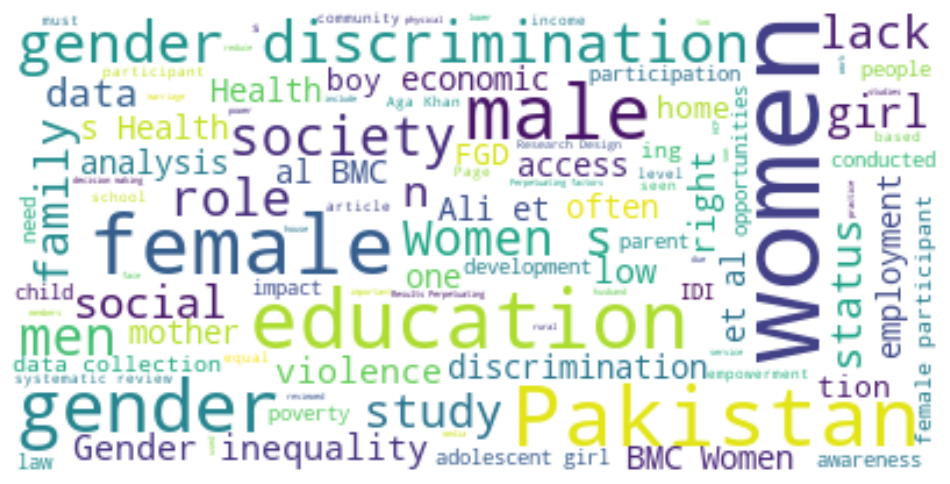

In [55]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(pdf_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

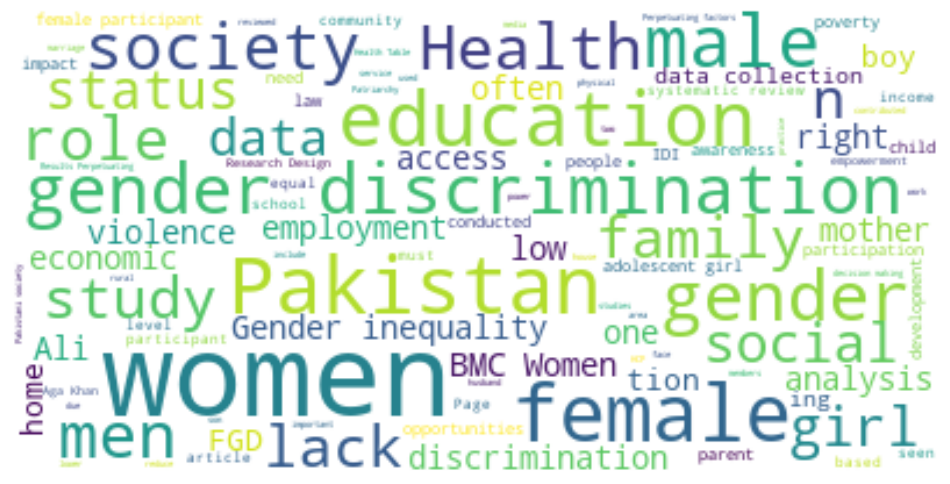

In [57]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["T", "J", "D", "S", "M", "H", "et al", "et", "al"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(pdf_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### **Explanation/Reasoning:** "Women," "gender," and "Pakistan" are highlighted as key phrases in the word cloud, suggesting that the document's focus is on gender-related issues in Pakistan. Other obvious terms like "education," "discrimination," and "family" all imply conversations about the duties and societal difficulties that women in this situation face.

In [ ]:
# !pip install rake_nltk

In [63]:
from rake_nltk import Rake
r = Rake()
r.extract_keywords_from_text(pdf_text)
r.get_ranked_phrases_with_scores()[:10]

[(54.8215734989648,
  'health care professionals districts qualitative assessment typestudy participants gilgit baltistan'),
 (53.721701982228296,
  'rural areascultural norms child rearing practices patriarchy religious leaders poverty co'),
 (50.00680272108844,
  'faisalabad multan sukkur sargodha sialkotcross sectional study self'),
 (43.49166666666667, '100 15 – 29 years old youth kpk'),
 (41.921497975708505,
  'food discriminationlarge family size low income male earners lack'),
 (41.86358685174475,
  'data collectionmain results perpetuating factors recommendations 16 khurshid'),
 (41.33025351841142,
  'data collectionmain results perpetuating factors recommendations 5 ejaz'),
 (41.30358685174475,
  'data collectionmain results perpetuating factors recommendations 1 iqbal'),
 (40.96358685174475,
  'data collectionmain results perpetuating factors recommendations 3 alam'),
 (40.95449594265384,
  'data collectionmain results perpetuating factors recommendations 9 kazimi')]

In [65]:
nlp = spacy.load('en_core_web_sm')
doc2 = nlp(pdf_text)
print(doc2.ents)

(Ali, BMC Women’s Health          , 2022, 2022, third, ses/ by/4, The Creative Commons Public Domain Dedication, Open Access
Perpetuation, Pakistani, three, Pakistan, Tazeen Saeed, Shahnaz Shahid Ali1, Sanober Nadeem3, Zahid, Sajid Soofi4, Yasmin Karim5, Shah Mohammad4, Zulfiqar Ahmed Bhutta6,7, Pakistan, two, Healthcare, Lady Health Visitors, Community Midwives, QSR NVivo 10, Pakistan, six, 1, 2, 3, 4, 5, 6) Micro, Pakistani, Pakistan, Gender, Pakistan, 1, Karachi, Pakistan, 2 Department of Community Health Sciences, Aga Khan University, Stadium Road, Karachi, Pakistan, 2, Ali, BMC Women’s Health          , 2022, 1, 2, 1, 2, 1, 3, Pakistan, 1, 2, Pakistan, 50%, 4, Pakistan, 2, Pakistani, 5, two, Pakistan, three, TSA, SSA, SN, two, PubMed, Google Scholar, WHO, the Aurat Foundation, Boolean, IPV, Pakistan, 2008, 2021, IPV, English, Pakistan, two, TSA, SN, the Reporting of Observational Studies in Epidemiology, The Preferred Reporting Items for Systematic Reviews, Meta-Analyses, Fig, 1, 

In [ ]:
# !pip install yake

In [69]:
import yake
kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(pdf_text)
for kw in keywords:
    print(kw)

('Women', 0.00041683109751140996)
('gender discrimination', 0.0004983477059701016)
('gender', 0.0008193301895133814)
('BMC Women', 0.0009626841443620674)
('Pakistan', 0.001220683243535429)
('Gender inequality', 0.0015013068558102562)
('Health', 0.00204899616612321)
('discrimination', 0.0028004324726719275)
('Setting Research Design', 0.0028189981814128713)
('data', 0.003286217159243721)
('Title Objectives Population', 0.0033090022504424573)
('female', 0.003827729481767586)
('education', 0.003931853151086624)
('Aga Khan University', 0.004629522845198466)
('Women ’s Health', 0.004805485445761051)
('society', 0.0048823038642254605)
('men', 0.005076574648658877)
('male', 0.005285085587647203)
('Married women', 0.005395725868404497)
('Data CollectionMain Results', 0.00547424046094721)


##### **Analysis:** Key themes were extracted from the document using a variety of methodologies for this analysis. Initially, a frequency distribution plot made with `matplotlib` displayed significant terms such as "women," "gender," and "Pakistan," which matched the document's emphasis on gender and social issues in Pakistan. The distinction between singular and plural forms (such as "woman" and "women"), which may be merged for clarity, was a drawback. The word cloud successfully highlighted important themes and offered a visual synopsis of important subjects. 
##### The keyword extraction libraries `RAKE` and `YAKE` were utilised to further refine the results. RAKE produced less accurate results, but YAKE was able to recognise relevant terms like "gender discrimination" and "health." YAKE continued to exhibit redundancy, nevertheless, by processing related terms differently. All things considered, YAKE provided a useful keyword summary that highlighted the main ideas of the paper.Key themes were extracted from the document using a variety of methodologies for this analysis. Initially, a frequency distribution plot made with `matplotlib` displayed significant terms such as "women," "gender," and "Pakistan," which matched the document's emphasis on gender and social issues in Pakistan. The distinction between singular and plural forms (such as "woman" and "women"), which may be merged for clarity, was a drawback. The word cloud successfully highlighted important themes and offered a visual synopsis of important subjects. 
##### The keyword extraction libraries `RAKE` and `YAKE` were utilised to further refine the results. RAKE produced less accurate results, but YAKE was able to recognise relevant terms like "gender discrimination" and "health." YAKE continued to exhibit redundancy, nevertheless, by processing related terms differently. All things considered, YAKE provided a useful keyword summary that highlighted the main ideas of the paper.r.r.

## Q3

In [ ]:
# !pip install tweepy

In [ ]:
# !pip install textblob

In [ ]:
import tweepy as tw
import json
import pandas as pd
import numpy as np
from textblob import TextBlob

In [135]:
twittertext = open('carlos_sainz_tweets.txt','r',encoding='utf-8')

In [137]:
corpus = twittertext.read()
corpus

'Ready for Abu Dhabi! One last race to give it our all. Thanks to the team for an incredible season. #F1 #AbuDhabiGP\nHappy to announce our extension with Ferrari. Let’s keep building something special. #ScuderiaFerrari #CarlosSainz\nGrateful for the incredible fans in Brazil. You guys are amazing! Obrigado! #BrazilGP\nUnfortunate day on the track, but we’ll come back stronger next time. #NeverGiveUp\nP3 on the grid for tomorrow’s race! Let’s make it count. #PolePosition #CarlosSainz\nIncredible job by the team this weekend. Everyone’s hard work paid off! Vamos! #Racing\nA bittersweet weekend in Austin, but we fight on. Thanks for the support, as always. #USGP\nThe vibes in Mexico City are unmatched. Gracias a todos por el apoyo! #MexicoGP\nAnother podium! What a race! Thank you, team, for an incredible car today. #3rdPlace #F1\nBig steps forward in Japan. Feeling more comfortable with the car every race. #Suzuka #Progress\nExcited to represent Ferrari in the new season. The journey co

## Part (a)

In [141]:
#opening the file in read mode
with open('carlos_sainz_tweets.txt', 'r', encoding='utf-8') as twittertext:
    #reading line by line
    for line in twittertext:
        print(line.strip())  

Ready for Abu Dhabi! One last race to give it our all. Thanks to the team for an incredible season. #F1 #AbuDhabiGP
Happy to announce our extension with Ferrari. Let’s keep building something special. #ScuderiaFerrari #CarlosSainz
Grateful for the incredible fans in Brazil. You guys are amazing! Obrigado! #BrazilGP
Unfortunate day on the track, but we’ll come back stronger next time. #NeverGiveUp
P3 on the grid for tomorrow’s race! Let’s make it count. #PolePosition #CarlosSainz
Incredible job by the team this weekend. Everyone’s hard work paid off! Vamos! #Racing
A bittersweet weekend in Austin, but we fight on. Thanks for the support, as always. #USGP
The vibes in Mexico City are unmatched. Gracias a todos por el apoyo! #MexicoGP
Another podium! What a race! Thank you, team, for an incredible car today. #3rdPlace #F1
Big steps forward in Japan. Feeling more comfortable with the car every race. #Suzuka #Progress
Excited to represent Ferrari in the new season. The journey continues. #S

## Part (b)

In [152]:
from textblob import TextBlob
positive_count = 0
negative_count = 0
positive_tweets = []
negative_tweets = []

with open('carlos_sainz_tweets.txt', 'r', encoding='utf-8') as twittertext:
    for line in twittertext:
        #creating a TextBlob object for each tweet
        analysis = TextBlob(line.strip())
        if analysis.sentiment.polarity > 0:
            positive_count += 1
            positive_tweets.append(line.strip())
        elif analysis.sentiment.polarity < 0:
            negative_count += 1
            negative_tweets.append(line.strip())

print(f"Total Positive Sentiments: {positive_count}")
print(f"Total Negative Sentiments: {negative_count}")

Total Positive Sentiments: 16
Total Negative Sentiments: 1


## Part (c)

In [156]:
print("Sample Positive Tweet: \n", positive_tweets[0] if positive_tweets else "No positive tweets found")
print("Sample Negative Tweet: \n", negative_tweets[0] if negative_tweets else "No negative tweets found")

Sample Positive Tweet: 
 Ready for Abu Dhabi! One last race to give it our all. Thanks to the team for an incredible season. #F1 #AbuDhabiGP
Sample Negative Tweet: 
 Unfortunate day on the track, but we’ll come back stronger next time. #NeverGiveUp


##### **Explanation/Reasoning:** The sentiment analysis algorithm identified **just 1 tweet** as unfavourable and **16 tweets as positive** based on your output. This finding implies that `TextBlob` might be inclined to classify more tweets as positive, perhaps as a result of the usually upbeat tone of tweets from well-known people like Carlos Sainz, which frequently emphasise inspiration and thankfulness. But the system may fail to pick up on nuances in language that are difficult to discern, such sarcasm or mild disappointment. This suggests that even while the algorithm does a respectable job, it might not fully capture the nuanced emotion in some tweets.

## Q4

In [15]:
books = pd.read_csv('books.csv')
#filtering relevant columns for the analysis
filtered_books = books[['BookID', 'Title']].dropna().reset_index(drop=True)
filtered_books.head()

,BookID,Title
0,1,Goat Brothers
1,2,The Missing Person
2,3,Don't Eat Your Heart Out Cookbook
3,4,When Your Corporate Umbrella Begins to Leak: A...
4,5,Amy Spangler's Breastfeeding : A Parent's Guide


## Part (a)

In [17]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\breeh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\breeh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\breeh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\breeh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [18]:
import re
import string
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\breeh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\breeh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\breeh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\breeh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [21]:
def clean_more_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2

def clean_txt(text):
  clean_text = []
  clean_text2 = []
  text = re.sub("'", "",str(text))
  text=re.sub("(\\d|\\W)+"," ",str(text))
  text = text.replace("nbsp", "")
  clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if clean_more_txt(word)]
  clean_text2 = [word for word in clean_text if clean_more_txt(word)]
  return " ".join(clean_text2)

In [23]:
filtered_books['clean_text'] = filtered_books['Title'].apply(clean_txt)

In [27]:
filtered_books.head()

,BookID,Title,clean_text
0,1,Goat Brothers,goat brothers
1,2,The Missing Person,miss person
2,3,Don't Eat Your Heart Out Cookbook,dont eat heart cookbook
3,4,When Your Corporate Umbrella Begins to Leak: A...,corporate umbrella begin leak handbook white c...
4,5,Amy Spangler's Breastfeeding : A Parent's Guide,amy spanglers breastfeed parent guide


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_jobid = tfidf_vectorizer.fit_transform((filtered_books['clean_text'])) #fitting and transforming the vector
tfidf_jobid

<890x2249 sparse matrix of type '<class 'numpy.float64'>'
	with 4289 stored elements in Compressed Sparse Row format>

In [31]:
query = filtered_books.iloc[[0]]
query

,BookID,Title,clean_text
0,1,Goat Brothers,goat brothers


In [33]:
from sklearn.metrics.pairwise import cosine_similarity

#convert query input to TF-IDF
user_tfidf = tfidf_vectorizer.transform(query['clean_text'])

#Calculate similarity score of query data with every record in the original data
cos_similarity_tfidf = map(lambda x: cosine_similarity(user_tfidf, x),tfidf_jobid)

In [35]:
output2 = list(cos_similarity_tfidf)

In [36]:
def get_recommendation(top, filtered_books, scores):
  recommendation = pd.DataFrame(columns = ['BookID', 'clean_text', 'score'])
  count = 0
  for i in top:
      recommendation.at[count, 'BookID'] = filtered_books['BookID'][i]
      recommendation.at[count, 'clean_text'] = filtered_books['clean_text'][i]
      recommendation.at[count, 'score'] =  scores[count]
      count += 1
  return recommendation

In [39]:
top = sorted(range(len(output2)), key=lambda i: output2[i], reverse=True)[:10]
list_scores = [output2[i][0][0] for i in top]
results = get_recommendation(top,filtered_books, list_scores)

In [41]:
results

,BookID,clean_text,score
0,1,goat brothers,1.0
1,2,miss person,0.0
2,3,dont eat heart cookbook,0.0
3,4,corporate umbrella begin leak handbook white c...,0.0
4,5,amy spanglers breastfeed parent guide,0.0
5,6,foundation leadership endure principles govern...,0.0
6,7,chicken soup soul stories open heart rekindle ...,0.0
7,8,journey heartsongs,0.0
8,9,search melancholy baby,0.0
9,10,christmas cookies,0.0


## Part (b)

In [7]:
# Upgrade SciPy to the latest version
# !pip uninstall scipy gensim
# !pip install scipy==1.8.0 gensim
# !pip install --upgrade gensim scipy

In [43]:
# Importing necessary libraries here
import sys
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from gensim.models import KeyedVectors
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

import warnings 
warnings.filterwarnings('ignore') # no warnings

In [45]:
#splitting the description into words
corpus = []
for words in filtered_books['clean_text']:
    corpus.append(words.split())

#tag each document
documents = [TaggedDocument(doc, [str(filtered_books['BookID'][i])]) for i, doc in enumerate(corpus)]

max_epochs = 5
vec_size = 15
alpha = 0.025

dl_model = Doc2Vec(vector_size=vec_size,
                alpha=alpha,
                min_alpha=0.00025,
                min_count=1,
                dm =1,
                epochs=max_epochs)

dl_model.build_vocab(documents)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    dl_model.train(documents,
                total_examples=dl_model.corpus_count,
                epochs=dl_model.epochs)
    # decrease the learning rate
    dl_model.alpha -= 0.0002
    # fix the learning rate, no decay
    dl_model.min_alpha = dl_model.alpha

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4


In [47]:
dl_model.save("books_doc2vec.model")

In [49]:
query = filtered_books['clean_text'][0]
query

'goat brothers'

query_data_tokenize = word_tokenize(query)
v1 = dl_model.infer_vector(query_data_tokenize)
similar_records=dl_model.dv.most_similar([v1])
similar_records

In [53]:
#Choose the index of the recommended data to see the quality/accuracy of recommendation
i = 0
idx = filtered_books[filtered_books['BookID']==int(similar_records[i][0])]
idx['score'] = similar_records[i][1]
idx

,BookID,Title,clean_text,score
816,817,Death Benefit: A Lawyer Uncovers a 20-year Pat...,death benefit lawyer uncover year pattern sedu...,0.974164


In [55]:
#Display full recommended data
filtered_books['clean_text'][idx.index[0]]

'death benefit lawyer uncover year pattern seduction arson murder'

##### **Analysis:** The results show that the TF-IDF and Word2Vec approaches significantly differ in terms of suggestion quality. In general, the TF-IDF suggestions produce low or zero similarity scores, suggesting that it has trouble identifying significant relationships that go beyond simple term matches. This restriction is most noticeable in book descriptions, where there are few shared terms, which results in recommendations that are less pertinent. However, as demonstrated by the book "Death Benefit: A Lawyer Uncovers....," which had a high similarity score with other related content, Word2Vec-based recommendations demonstrate a more nuanced knowledge of context and topic. Beyond simple keyword matching, Word2Vec provides contextually relevant recommendations by effectively identifying thematic linkages. Overall, TF-IDF's method is limited to surface-level keyword similarities, whereas Word2Vec offers fuller, more aligned suggestions.